Blast_PCRM_R16-0228B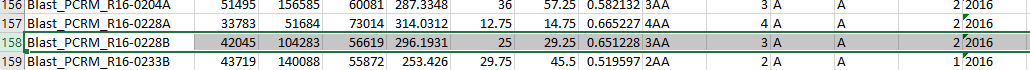

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
from google.colab import drive
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/PFA' 

Mounted at /content/drive


In [2]:
import cv2
import csv
from glob import glob
from tqdm import tqdm
import numpy as np
import imutils
import pandas as pd

In [3]:
dataset = pd.read_csv(drive_path+'/new_data/grades_features.csv')

print(dataset)

                 File Name  ICM Area  TE Area  ZP Area  Blastocyst radius  \
0    Blast_PCRM_1201754 D5     62799   102288    83112         271.358768   
1    Blast_PCRM_1202041 D5     47310   105459    80883         246.381662   
2    Blast_PCRM_1202043 D5     38982   106134    85803         250.317128   
3    Blast_PCRM_1202182 D5     39735    65250    71730         306.856382   
4    Blast_PCRM_1202183 D5     60852    90555    54135         257.930300   
..                     ...       ...      ...      ...                ...   
226   Blast_PCRM_R16-0195A     49257    87111    74004         365.427645   
227   Blast_PCRM_R16-0198A     51210    98829    52005         331.780894   
228   Blast_PCRM_R16-0199A     49212    91284    67296         343.402415   
229   Blast_PCRM_R16-0276A     51474    97434    66207         358.262607   
230   Blast_PCRM_R16-0344A     30267   106191    86211         332.284196   

     TE Thickness  ZP Thickness  Expansion_left GRADE  Expansion_right ICM 

[0.21174149 0.12586964 0.14043406 0.11855881 0.1516907  0.1352333
 0.116472  ]


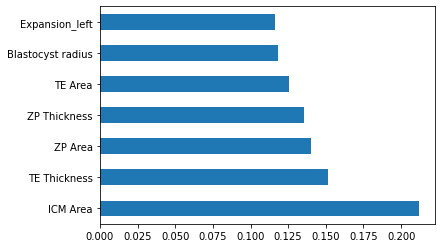

In [9]:
X = dataset.iloc[:,1:8]  #independent columns
y = dataset.iloc[:,-4]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = dataset[['ICM Area' , 'TE Thickness', 'ZP Area']]
y = dataset[['ICM']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
from sklearn.svm import SVC
model = SVC(C=10,kernel='linear')

In [15]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, kernel='linear')

In [16]:
model.score(X_test, y_test)

0.6808510638297872

In [17]:
icm = model.predict([[43980,17,43980]])
print(icm[0])

A


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [18]:
icm_value = icm[0]

[0.13655457 0.1410865  0.14224348 0.15912238 0.13662397 0.13303112
 0.15133797]


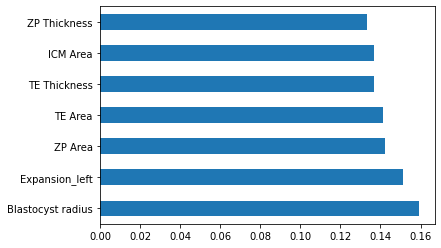

In [19]:
X = dataset.iloc[:,1:8]  #independent columns
y = dataset.iloc[:,-3]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [20]:
X = dataset[['ZP Area' , 'Blastocyst radius', 'Expansion_left']]
y = dataset[['TE']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, kernel='linear')

In [23]:
model.score(X_test, y_test)

0.5106382978723404

In [24]:
te = model.predict([[57342,326.008836,0.622535895]]) # Blast_PCRM_R16-0228B
print(te[0])

A


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [25]:
te_value = te[0]

[0.06888337 0.15766365 0.07580663 0.16695498 0.09639393 0.23802209
 0.19627535]


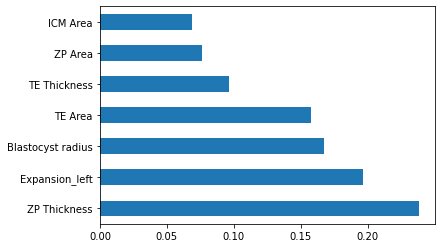

In [26]:
X = dataset.iloc[:,1:8]  #independent columns
y = dataset.iloc[:,-5]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [27]:
X = dataset[['ZP Thickness', 'Expansion_left','Blastocyst radius']]
y = dataset[['Expansion_right']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesClassifier()

In [29]:
model.score(X_test, y_test)

0.7659574468085106

In [30]:
expansion = model.predict([[17,0.622535895,326.008836]]) 
print(expansion[0])

4


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [31]:
exp = expansion[0]

In [33]:
print('GRADE: ',exp,icm_value,te_value)
if exp < 3 :
  print('AVERAGE')
else:
  if te_value == 'A' or te_value == 'B' or icm_value == 'A' or icm_value == 'B':
    print('GOOD')
  elif te_value == 'C' or icm_value == 'C':
    print('AVERAGE')
  elif te_value == 'C' and icm_value == 'C': 
    print('BAD')

GRADE:  4 A A
GOOD
